The unadjusted algorithm is below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import quad
import time



def matrix_exponential(matrix, t):
    return expm(matrix * t)




# 使用 D1 进行模拟
def run_simulation_D1(delta_t, end_t, gamma, beta, second_iteration, D1, initial):
    D = D1
    h = delta_t / 2
    n_t = int(end_t / delta_t)
    
    # 初始化变量
    x = np.zeros(n_t + 1)
    p = np.zeros(n_t + 1)

    # 使用给定的 initial 初始化 x[0]
    x[0] = initial
    p[0] = 0
    
    for i in range(n_t):
        # 第一次迭代使用矩阵指数公式
        W_h = np.random.normal(0, np.sqrt(h))
        exp_Dh = matrix_exponential(D, h)
        
        update_vector = exp_Dh @ np.array([x[i], p[i]]) + exp_Dh @ np.array([0, np.sqrt(2 * gamma / beta)]) * W_h
        x_mid, p_mid = update_vector
        
        # 第二次迭代使用前向欧拉公式
        x_mid, p_mid = second_iteration(x_mid, p_mid, delta_t, beta)
        
        # 第三次迭代使用矩阵指数公式
        W_h = np.random.normal(0, np.sqrt(h))
        update_vector = exp_Dh @ np.array([x_mid, p_mid]) + exp_Dh @ np.array([0, np.sqrt(2 * gamma / beta)]) * W_h
        if i + 1 < len(x):  # 确保不会超出范围
            x[i + 1], p[i + 1] = update_vector
        else:
            break
    
    return np.array(x[-1])

# 使用 D2 进行模拟
def run_simulation_D2(delta_t, end_t, gamma, beta, second_iteration, D2, initial):
    D = D2
    h = delta_t / 2
    n_t = int(end_t / delta_t)
    
    # 初始化变量
    x = np.zeros(n_t + 1)
    p = np.zeros(n_t + 1)

    # 使用给定的 initial 初始化 x[0]
    x[0] = initial
    p[0] = 0
    
    for i in range(n_t):
        # 第一次迭代使用前向欧拉公式（原来的第二次迭代）
        x_mid, p_mid = second_iteration(x[i], p[i], h, beta)
        
        # 在第一次和第二次迭代之间添加 A 迭代
        x_mid += p_mid * h
        p_mid += 0
        
        # 第二次迭代使用矩阵指数公式（原来的第一次迭代）
        W_h = np.random.normal(0, np.sqrt(delta_t))
        exp_Dh = matrix_exponential(D, delta_t)
        update_vector = exp_Dh @ np.array([x_mid, p_mid]) + exp_Dh @ np.array([0, np.sqrt(2 * gamma / beta)]) * W_h
        x_mid, p_mid = update_vector
        
        # 在第二次和第三次迭代之间添加 A 迭代
        x_mid += p_mid * h
        p_mid += 0
        
        # 第三次迭代使用前向欧拉公式（原来的第二次迭代）
        x_mid, p_mid = second_iteration(x_mid, p_mid, h, beta)
        
        if i + 1 < len(x):  # 确保不会超出范围
            x[i + 1], p[i + 1] = x_mid, p_mid
        else:
            break
    
    return np.array(x[-1])

# 使用 D3 进行模拟
def run_simulation_D3(delta_t, end_t, gamma, beta, second_iteration, D3, initial):
    D = D3
    h = delta_t / 2
    n_t = int(end_t / delta_t)
    
    # 初始化变量
    x = np.zeros(n_t + 1)
    p = np.zeros(n_t + 1)

    # 使用给定的 initial 初始化 x[0]
    x[0] = initial
    p[0] = 0
    
    for i in range(n_t):
        # 第一次迭代使用前向欧拉公式（原来的第二次迭代）
        x_mid, p_mid = second_iteration(x[i], p[i], h, beta)
        
        # 第二次迭代使用矩阵指数公式（原来的第一次迭代）
        W_h = np.random.normal(0, np.sqrt(delta_t))
        exp_Dh = matrix_exponential(D, delta_t)
        update_vector = exp_Dh @ np.array([x_mid, p_mid]) + exp_Dh @ np.array([0, np.sqrt(2 * gamma / beta)]) * W_h
        x_mid, p_mid = update_vector
        
        # 第三次迭代使用前向欧拉公式（原来的第二次迭代）
        x_mid, p_mid = second_iteration(x_mid, p_mid, h, beta)
        
        if i + 1 < len(x):  # 确保不会超出范围
            x[i + 1], p[i + 1] = x_mid, p_mid
        else:
            break
    
    return np.array(x[-1])


ModuleNotFoundError: No module named 'scipy'

The adapted time step algorithm is below.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import quad
import time



def matrix_exponential(matrix, t):
    return expm(matrix * t)

def run_simulation_D1_transformed(fixed_dt, end_t, gamma, beta, second_iteration_transformed, D1, dynamic_time_step,initial):
    D = D1
    n_t = int(end_t / fixed_dt)
    
    # 初始化变量
    x = np.zeros(n_t + 1)
    p = np.zeros(n_t + 1)

    # 使用给定的 initial 初始化 x[0]
    x[0] = initial
    p[0] = 0

    
    for i in range(n_t):
        delta_t = dynamic_time_step(x[i], fixed_dt)
        h = delta_t / 2
        W_h = np.random.normal(0, np.sqrt(h))
        exp_Dh = matrix_exponential(D, h)
        
        update_vector = exp_Dh @ np.array([x[i], p[i]]) + exp_Dh @ np.array([0, np.sqrt(2 * gamma / beta)]) * W_h
        x_mid, p_mid = update_vector
        
        x_mid, p_mid = second_iteration_transformed(x_mid, p_mid, delta_t, beta)
        
        W_h = np.random.normal(0, np.sqrt(h))
        update_vector = exp_Dh @ np.array([x_mid, p_mid]) + exp_Dh @ np.array([0, np.sqrt(2 * gamma / beta)]) * W_h
        
        
        if i + 1 < len(x):  # 确保不会超出范围
            x[i + 1], p[i + 1] = update_vector
        else:
            break
    
    
    
    return np.array(x[-1])


def run_simulation_D2_transformed(fixed_dt, end_t, gamma, beta, second_iteration_transformed, D2, dynamic_time_step,initial):
    D = D2
    n_t = int(end_t / fixed_dt)
    
    # 初始化变量
    x = np.zeros(n_t + 1)
    p = np.zeros(n_t + 1)

    # 使用给定的 initial 初始化 x[0]
    x[0] = initial
    p[0] = 0

   
    for i in range(n_t):
        delta_t = dynamic_time_step(x[i], fixed_dt)
        h = delta_t / 2
        x_mid, p_mid = second_iteration_transformed(x[i], p[i], h, beta)
        
        x_mid += p_mid * h
        p_mid += 0
        
        W_h = np.random.normal(0, np.sqrt(delta_t))
        exp_Dh = matrix_exponential(D, delta_t)
        update_vector = exp_Dh @ np.array([x_mid, p_mid]) + exp_Dh @ np.array([0, np.sqrt(2 * gamma / beta)]) * W_h
        x_mid, p_mid = update_vector
        
        x_mid += p_mid * h
        p_mid += 0
        
        x_mid, p_mid = second_iteration_transformed(x_mid, p_mid, h, beta)
        
        if i + 1 < len(x):  # 确保不会超出范围
            x[i + 1], p[i + 1] = x_mid, p_mid
        else:
            break
    
    return np.array(x[-1])
    
    
    

def run_simulation_D3_transformed(fixed_dt, end_t, gamma, beta, second_iteration_transformed, D3, dynamic_time_step,initial):
    D = D3
    n_t = int(end_t / fixed_dt)
    
    # 初始化变量
    x = np.zeros(n_t + 1)
    p = np.zeros(n_t + 1)

    # 使用给定的 initial 初始化 x[0]
    x[0] = initial
    p[0] = 0
    
    for i in range(n_t):
        delta_t = dynamic_time_step(x[i], fixed_dt)
        h = delta_t / 2
        x_mid, p_mid = second_iteration_transformed(x[i], p[i], h, beta)
        
        W_h = np.random.normal(0, np.sqrt(delta_t))
        exp_Dh = matrix_exponential(D, delta_t)
        update_vector = exp_Dh @ np.array([x_mid, p_mid]) + exp_Dh @ np.array([0, np.sqrt(2 * gamma / beta)]) * W_h
        x_mid, p_mid = update_vector
        
        x_mid, p_mid = second_iteration_transformed(x_mid, p_mid, h, beta)
        
        if i + 1 < len(x):  # 确保不会超出范围
            x[i + 1], p[i + 1] = x_mid, p_mid
        else:
            break
    
    
    return np.array(x[-1])

We first plot the pdf of the simulated distribution and the theoretical distribution to see whether it could converge to the target distribution. You can switch the bar to see different plots when time step is changed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import quad
import time
import ipywidgets as widgets
from IPython.display import display
from delta_t import run_simulation_D1, run_simulation_D2, run_simulation_D3
from adapt_deltat import run_simulation_D1_transformed, run_simulation_D2_transformed, run_simulation_D3_transformed

# 定义参数
gamma = 1
beta = 1
num_delta_t = 10
num_simulations = 500
x_start = -10
x_end = 10
num_x_steps = 400
end_t = 50

# 定义矩阵 D1 和 D2
D1 = np.array([[0, 1], [0, -gamma]])
D2 = np.array([[0, 0], [0, -gamma]])
D3 = np.array([[0, 1], [0, -gamma]])

# 定义不同的时间步长
fixed_dts = np.linspace(0.15, 1.5, num_delta_t)

# 动态时间步长函数
def dynamic_time_step(x_prev, fixed_dt):
    return fixed_dt * k_function(x_prev)

# 定义势函数和函数 k(x)
def potential(x):
    return 0.5 * x**2

def k_function(x):
    return np.exp(-0.5 * x**2)

def normalizing_constant():
    integrand = lambda x: np.exp(-beta * potential(x))
    integral, _ = quad(integrand, -np.inf, np.inf)
    return 1 / integral

def rho_eq(x):
    Z = normalizing_constant()
    return Z * np.exp(-beta * potential(x))

def compute_x_real(x_values):
    return np.array([rho_eq(x) for x in x_values])

# 手动计算势函数的梯度
def grad_potential(x):
    return x

# 手动计算 k(x) 的对数梯度
def grad_log_k_function(x):
    return -x

# 第二次迭代
def second_iteration(x, p, delta_t, beta):
    grad_potential_x = grad_potential(x)
    dp = -(grad_potential_x) * delta_t
    p_new = p + dp
    x_new = x
    return x_new, p_new

# 第二次迭代 (transformed)
def second_iteration_transformed(x, p, delta_t, beta):
    grad_potential_x = grad_potential(x)
    grad_log_k_x = grad_log_k_function(x)
    dp = -(grad_potential_x - (1 / beta) * grad_log_k_x) * delta_t
    p_new = p + dp
    x_new = x
    return x_new, p_new

# 计算 x_real 分布
x_values = np.linspace(x_start, x_end, num_x_steps)
x_real = compute_x_real(x_values)

# 初始化模拟数据存储
simulated_pdfs_D1 = []
simulated_pdfs_D2 = []
simulated_pdfs_D3 = []
simulated_pdfs_D1_transformed = []
simulated_pdfs_D2_transformed = []
simulated_pdfs_D3_transformed = []

# 生成模拟数据
for fixed_dt in fixed_dts:
    start_time = time.time()
    
    final_x_values_D1 = []
    final_x_values_D2 = []
    final_x_values_D3 = []
    final_x_values_D1_transformed = []
    final_x_values_D2_transformed = []
    final_x_values_D3_transformed = []
    
    for _ in range(num_simulations):
        initial = np.random.normal(0, 1)
        final_x_values_D1.append(run_simulation_D1(fixed_dt, end_t, gamma, beta, second_iteration, D1, initial))
        final_x_values_D2.append(run_simulation_D2(fixed_dt, end_t, gamma, beta, second_iteration, D2, initial))
        final_x_values_D3.append(run_simulation_D3(fixed_dt, end_t, gamma, beta, second_iteration, D3, initial))
        final_x_values_D1_transformed.append(run_simulation_D1_transformed(fixed_dt, end_t, gamma, beta, second_iteration_transformed, D1, dynamic_time_step, initial))
        final_x_values_D2_transformed.append(run_simulation_D2_transformed(fixed_dt, end_t, gamma, beta, second_iteration_transformed, D2, dynamic_time_step, initial))
        final_x_values_D3_transformed.append(run_simulation_D3_transformed(fixed_dt, end_t, gamma, beta, second_iteration_transformed, D3, dynamic_time_step, initial))
    
    final_x_values_D1 = np.array(final_x_values_D1).flatten()
    hist_D1, bins_D1 = np.histogram(final_x_values_D1, bins=50, density=True)
    simulated_pdfs_D1.append((bins_D1, hist_D1))
    
    final_x_values_D2 = np.array(final_x_values_D2).flatten()
    hist_D2, bins_D2 = np.histogram(final_x_values_D2, bins=50, density=True)
    simulated_pdfs_D2.append((bins_D2, hist_D2))
    
    final_x_values_D3 = np.array(final_x_values_D3).flatten()
    hist_D3, bins_D3 = np.histogram(final_x_values_D3, bins=50, density=True)
    simulated_pdfs_D3.append((bins_D3, hist_D3))

    final_x_values_D1_transformed = np.array(final_x_values_D1_transformed).flatten()
    hist_D1_transformed, bins_D1_transformed = np.histogram(final_x_values_D1_transformed, bins=50, density=True)
    simulated_pdfs_D1_transformed.append((bins_D1_transformed, hist_D1_transformed))
    
    final_x_values_D2_transformed = np.array(final_x_values_D2_transformed).flatten()
    hist_D2_transformed, bins_D2_transformed = np.histogram(final_x_values_D2_transformed, bins=50, density=True)
    simulated_pdfs_D2_transformed.append((bins_D2_transformed, hist_D2_transformed))
    
    final_x_values_D3_transformed = np.array(final_x_values_D3_transformed).flatten()
    hist_D3_transformed, bins_D3_transformed = np.histogram(final_x_values_D3_transformed, bins=50, density=True)
    simulated_pdfs_D3_transformed.append((bins_D3_transformed, hist_D3_transformed))

    end_time = time.time()
    print(f"delta_t = {fixed_dt:.2f}, Iteration Time = {end_time - start_time:.2f} seconds")

# 创建滑动条
delta_t_slider = widgets.FloatSlider(
    value=fixed_dts[0],
    min=fixed_dts[0],
    max=fixed_dts[-1],
    step=0.01,
    description='Delta t:',
    continuous_update=False
)

def plot_pdf(delta_t):
    idx = np.argmin(np.abs(fixed_dts - delta_t))
    bins_D1, pdf_simulated_D1 = simulated_pdfs_D1[idx]
    bins_D2, pdf_simulated_D2 = simulated_pdfs_D2[idx]
    bins_D3, pdf_simulated_D3 = simulated_pdfs_D3[idx]
    bins_D1_transformed, pdf_simulated_D1_transformed = simulated_pdfs_D1_transformed[idx]
    bins_D2_transformed, pdf_simulated_D2_transformed = simulated_pdfs_D2_transformed[idx]
    bins_D3_transformed, pdf_simulated_D3_transformed = simulated_pdfs_D3_transformed[idx]
    
    plt.figure(figsize=(12, 8))
    
    plt.plot((bins_D1[:-1] + bins_D1[1:]) / 2, pdf_simulated_D1, label='Simulated PDF D1')
    plt.plot((bins_D2[:-1] + bins_D2[1:]) / 2, pdf_simulated_D2, label='Simulated PDF D2')
    plt.plot((bins_D3[:-1] + bins_D3[1:]) / 2, pdf_simulated_D3, label='Simulated PDF D3')
    plt.plot((bins_D1_transformed[:-1] + bins_D1_transformed[1:]) / 2, pdf_simulated_D1_transformed, label='Simulated PDF D1_transformed', linestyle='--')
    plt.plot((bins_D2_transformed[:-1] + bins_D2_transformed[1:]) / 2, pdf_simulated_D2_transformed, label='Simulated PDF D2_transformed', linestyle='--')
    plt.plot((bins_D3_transformed[:-1] + bins_D3_transformed[1:]) / 2, pdf_simulated_D3_transformed, label='Simulated PDF D3_transformed', linestyle='--')
    
    plt.plot(x_values, x_real, label='Theoretical PDF', linestyle='--', color='black')
    
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.title(f'PDF Comparison at Delta t = {delta_t:.2f}')
    plt.legend()
    plt.show()




# 将滑动条与绘图函数绑定
widgets.interact(plot_pdf, delta_t=delta_t_slider)


delta_t = 0.15, Iteration Time = 235.70 seconds
delta_t = 0.30, Iteration Time = 110.42 seconds
delta_t = 0.45, Iteration Time = 76.35 seconds
delta_t = 0.60, Iteration Time = 56.84 seconds
delta_t = 0.75, Iteration Time = 45.33 seconds
delta_t = 0.90, Iteration Time = 38.35 seconds
delta_t = 1.05, Iteration Time = 32.99 seconds
delta_t = 1.20, Iteration Time = 28.74 seconds
delta_t = 1.35, Iteration Time = 25.91 seconds
delta_t = 1.50, Iteration Time = 23.23 seconds


interactive(children=(FloatSlider(value=0.15, continuous_update=False, description='Delta t:', max=1.5, min=0.…

<function __main__.plot_pdf(delta_t)>

Then we calculate the error between simualated distribution and the target distribution. The error is defined by 
\begin{equation}
error= \int |\hat{\rho}(x)-\rho(x)|dx
\end{equation}

delta_t = 0.1500, Iteration Time = 174.5252 seconds
delta_t = 0.3000, Iteration Time = 98.2825 seconds
delta_t = 0.4500, Iteration Time = 66.5308 seconds
delta_t = 0.6000, Iteration Time = 50.4112 seconds
delta_t = 0.7500, Iteration Time = 39.6557 seconds
delta_t = 0.9000, Iteration Time = 33.7343 seconds
delta_t = 1.0500, Iteration Time = 29.3270 seconds
delta_t = 1.2000, Iteration Time = 29.5155 seconds
delta_t = 1.3500, Iteration Time = 27.8272 seconds
delta_t = 1.5000, Iteration Time = 20.0691 seconds


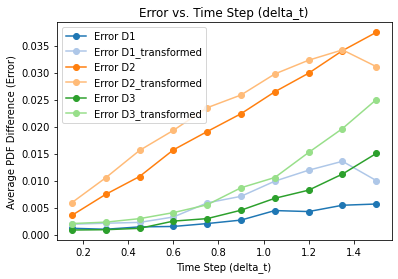

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import quad
import time
from delta_t import run_simulation_D1, run_simulation_D2, run_simulation_D3
from adapt_deltat import run_simulation_D1_transformed, run_simulation_D2_transformed, run_simulation_D3_transformed

# 定义参数
gamma = 1
beta = 1  # 假设 beta 为常数
num_delta_t = 10
num_simulations = 1000  # 运行的模拟次数
x_start = -10  # x 轴起始位置
x_end = 10     # x 轴结束位置
num_x_steps = 400  # x 轴的步数
end_t = 20

# 定义不同的时间步长
fixed_dts = np.zeros(num_delta_t)
for i in range(num_delta_t):
    fixed_dts[i] = 0.15 * (i + 1)
    
# 动态时间步长函数
def dynamic_time_step(x_prev, fixed_dt):
    return fixed_dt * k_function(x_prev) # 可以根据需要调整

# 定义矩阵 D1 和 D2
D1 = np.array([[0, 1], [0, -gamma]])
D2 = np.array([[0, 0], [0, -gamma]])
D3 = np.array([[0, 1], [0, -gamma]])

def matrix_exponential(matrix, t):
    return expm(matrix * t)

# 定义势函数和函数 k(x)
def potential(x):
    return 0.5 * x ** 2 

def k_function(x):
    return np.exp(-0.5 * x ** 2)  # k(x) 为常数

# 手动计算势函数的梯度
def grad_potential(x):
    return x

# 手动计算 k(x) 的对数梯度
def grad_log_k_function(x):
    return -x


# 计算边缘分布的归一化常数
def normalizing_constant():
    integrand = lambda x: np.exp(-beta * potential(x))
    integral, _ = quad(integrand, -np.inf, np.inf)
    return 1 / integral

# 计算边缘分布
def rho_eq(x):
    Z = normalizing_constant()
    return Z * np.exp(-beta * potential(x))

# 计算理论 PDF
def compute_theoretical_pdf(x_values):
    return np.array([rho_eq(x) for x in x_values])

# 第二次迭代
def second_iteration_transformed(x, p, delta_t, beta):
    grad_potential_x = grad_potential(x)
    grad_log_k_x = grad_log_k_function(x)
    dp = -(grad_potential_x - (1 / beta) * grad_log_k_x) * delta_t
    p_new = p + dp
    x_new = x
    return x_new, p_new

# 第二次迭代
def second_iteration(x, p, delta_t, beta):
    grad_potential_x = grad_potential(x)
    dp = -(grad_potential_x) * delta_t
    p_new = p + dp
    x_new = x
    return x_new, p_new

# 计算 x_real 分布
x_values = np.linspace(x_start, x_end, num_x_steps)
x_real = compute_theoretical_pdf(x_values)

# 初始化错误列表
errors_D1 = []
errors_D2 = []
errors_D3 = []
errors_D1_transformed = []
errors_D2_transformed = []
errors_D3_transformed = []

for fixed_dt in fixed_dts:
    start_time = time.time()
    
    # D1 和 D1_transformed 的模拟
    final_x_values_D1 = []
    final_x_values_D1_transformed = []
    final_x_values_D2 = []
    final_x_values_D2_transformed = []
    final_x_values_D3 = []
    final_x_values_D3_transformed = []

    for _ in range(num_simulations):
        initial = np.random.normal(0, 1)
        final_x_values_D1.append(run_simulation_D1(fixed_dt, end_t, gamma, beta, second_iteration, D1, initial))
        final_x_values_D1_transformed.append(run_simulation_D1_transformed(fixed_dt, end_t, gamma, beta, second_iteration_transformed, D1, dynamic_time_step, initial))
        final_x_values_D2.append(run_simulation_D2(fixed_dt, end_t, gamma, beta, second_iteration, D2, initial))
        final_x_values_D2_transformed.append(run_simulation_D2_transformed(fixed_dt, end_t, gamma, beta, second_iteration_transformed, D2, dynamic_time_step, initial))
        final_x_values_D3.append(run_simulation_D3(fixed_dt, end_t, gamma, beta, second_iteration, D3, initial))
        final_x_values_D3_transformed.append(run_simulation_D3_transformed(fixed_dt, end_t, gamma, beta, second_iteration_transformed, D3, dynamic_time_step, initial))
    
    final_x_values_D1 = np.array(final_x_values_D1).flatten()
    final_x_values_D1_transformed = np.array(final_x_values_D1_transformed).flatten()
    final_x_values_D2 = np.array(final_x_values_D2).flatten()
    final_x_values_D2_transformed = np.array(final_x_values_D2_transformed).flatten()
    final_x_values_D3 = np.array(final_x_values_D3).flatten()
    final_x_values_D3_transformed = np.array(final_x_values_D3_transformed).flatten()

    def compute_pdf_and_error(final_x_values, x_values, theoretical_density):
        # 计算模拟 PDF
        hist, bins = np.histogram(final_x_values, bins=50, density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        
        # 计算模拟 PDF 并确保 bin_centers 和 hist 一致
        simulated_pdf = np.interp(x_values, bin_centers, hist, left=0, right=0)
        
        # 计算理论 PDF
        theoretical_pdf = np.interp(x_values, x_values, theoretical_density)
        
        # 计算误差
        error = np.mean(np.abs(simulated_pdf - theoretical_pdf))
        return error

    # 计算误差
    errors_D1.append(compute_pdf_and_error(final_x_values_D1, x_values, x_real))
    errors_D1_transformed.append(compute_pdf_and_error(final_x_values_D1_transformed, x_values, x_real))
    errors_D2.append(compute_pdf_and_error(final_x_values_D2, x_values, x_real))
    errors_D2_transformed.append(compute_pdf_and_error(final_x_values_D2_transformed, x_values, x_real))
    errors_D3.append(compute_pdf_and_error(final_x_values_D3, x_values, x_real))
    errors_D3_transformed.append(compute_pdf_and_error(final_x_values_D3_transformed, x_values, x_real))

    end_time = time.time()
    print(f"delta_t = {fixed_dt:.4f}, Iteration Time = {end_time - start_time:.4f} seconds")

# 预定义颜色
colors = {
    'D1': '#1f77b4',  # 深蓝色
    'D1_transformed': '#aec7e8',  # 浅蓝色
    'D2': '#ff7f0e',  # 深橙色
    'D2_transformed': '#ffbb78',  # 浅橙色
    'D3': '#2ca02c',  # 深绿色
    'D3_transformed': '#98df8a',  # 浅绿色
}

# 绘制误差与 delta_t 的关系图
plt.figure()
plt.plot(fixed_dts, errors_D1, marker='o', color=colors['D1'], label='Error D1')
plt.plot(fixed_dts, errors_D1_transformed, marker='o', color=colors['D1_transformed'], label='Error D1_transformed')
plt.plot(fixed_dts, errors_D2, marker='o', color=colors['D2'], label='Error D2')
plt.plot(fixed_dts, errors_D2_transformed, marker='o', color=colors['D2_transformed'], label='Error D2_transformed')
plt.plot(fixed_dts, errors_D3, marker='o', color=colors['D3'], label='Error D3')
plt.plot(fixed_dts, errors_D3_transformed, marker='o', color=colors['D3_transformed'], label='Error D3_transformed')
plt.xlabel('Time Step (delta_t)')
plt.ylabel('Average PDF Difference (Error)')
plt.title('Error vs. Time Step (delta_t)')
plt.legend()
plt.show()